In [1]:
# Clone MEDIAR github repo
!git clone https://github.com/Lee-Gihun/MEDIAR.git
%rm -rf ./sample_data
%cd MEDIAR



Cloning into 'MEDIAR'...
remote: Enumerating objects: 588, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 588 (delta 65), reused 49 (delta 49), pack-reused 507
Receiving objects: 100% (588/588), 15.32 MiB | 8.29 MiB/s, done.
Resolving deltas: 100% (322/322), done.
/home/vplab/Desktop/kanth/MEDIAR/MEDIAR


/home/vplab/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# # Install dependencies
%pip install -r requirements.txt
%pip install segmentation-models-pytorch==0.3.1
%pip install wandb
!wandb off

Defaulting to user installation because normal site-packages is not writeable
  Using cached segmentation_models_pytorch-0.3.3-py3-none-any.whl (106 kB)
  Using cached timm-0.9.2-py3-none-any.whl (2.2 MB)
  Attempting uninstall: timm
    Found existing installation: timm 0.4.12
    Uninstalling timm-0.4.12:
      Successfully uninstalled timm-0.4.12
  Attempting uninstall: segmentation_models_pytorch
    Found existing installation: segmentation-models-pytorch 0.3.1
    Uninstalling segmentation-models-pytorch-0.3.1:
      Successfully uninstalled segmentation-models-pytorch-0.3.1
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached segmentation_models_pytorch-0.3.1-py3-none-any.whl (102 kB)
  Using cached timm-0.4.12-py3-none-any.whl (376 kB)
  Attempting uninstall: timm
    Found existing installation: timm 0.9.2
    Uninstalling timm-0.9.2:
      Successfully uninstalled timm-0.

In [3]:
!pip install gdown

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Download MEDIAR pretrained weights
%mkdir weights
!gdown https://drive.google.com/uc?id=168MtudjTMLoq9YGTyoD2Rjl_d3Gy6c_L -O weights/from_phase1.pth
!gdown https://drive.google.com/uc?id=1JJ2-QKTCk-G7sp5ddkqcifMxgnyOrXjx -O weights/from_phase2.pth

model_path1 = "./weights/from_phase1.pth"
model_path2 = "./weights/from_phase2.pth"

import torch
weights1 = torch.load(model_path1, map_location="cpu")
weights2 = torch.load(model_path2, map_location="cpu")

Downloading...
From (original): https://drive.google.com/uc?id=168MtudjTMLoq9YGTyoD2Rjl_d3Gy6c_L
From (redirected): https://drive.google.com/uc?id=168MtudjTMLoq9YGTyoD2Rjl_d3Gy6c_L&confirm=t&uuid=15fe0d7d-c936-41cd-9577-a3f9a401d0e2
To: /home/vplab/Desktop/kanth/MEDIAR/MEDIAR/weights/from_phase1.pth
100%|████████████████████████████████████████| 486M/486M [00:09<00:00, 50.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1JJ2-QKTCk-G7sp5ddkqcifMxgnyOrXjx
From (redirected): https://drive.google.com/uc?id=1JJ2-QKTCk-G7sp5ddkqcifMxgnyOrXjx&confirm=t&uuid=1c8524e2-6778-486f-a477-e34363c17164
To: /home/vplab/Desktop/kanth/MEDIAR/MEDIAR/weights/from_phase2.pth
100%|████████████████████████████████████████| 486M/486M [00:10<00:00, 44.4MB/s]


In [5]:
import torch
import glob
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

from train_tools import *
from train_tools.models import MEDIARFormer
from core.MEDIAR import Predictor, EnsemblePredictor

model_args = {
    "classes": 3,
    "decoder_channels": [1024, 512, 256, 128, 64],
    "decoder_pab_channels": 256,
    "encoder_name": 'mit_b5',
    "in_channels": 3
}

model1 = MEDIARFormer(**model_args)
model1.load_state_dict(weights1, strict=False)

model2 = MEDIARFormer(**model_args)
model2.load_state_dict(weights2, strict=False)

Downloading: "https://github.com/qubvel/segmentation_models.pytorch/releases/download/v0.0.2/mit_b5.pth" to /home/vplab/.cache/torch/hub/checkpoints/mit_b5.pth
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313M/313M [00:15<00:00, 21.2MB/s]


<All keys matched successfully>

In [17]:
input_path = "./image/examples"

# img1 = io.imread(f"{input_path}/img1.tiff") #
# io.imshow(img1)

In [9]:
output_path = "results"

predictor = Predictor(model1, "cuda:0", input_path, output_path, algo_params={"use_tta": False})
_ = predictor.conduct_prediction()


Prediction finished: 14728.jpg; img size = torch.Size([1, 3, 512, 512]); costing: 0.24s
Prediction finished: 14730.jpg; img size = torch.Size([1, 3, 512, 512]); costing: 0.21s
Prediction finished: 14732.jpg; img size = torch.Size([1, 3, 512, 512]); costing: 0.17s
Prediction finished: 14880.jpg; img size = torch.Size([1, 3, 512, 512]); costing: 0.18s
Prediction finished: 14882.jpg; img size = torch.Size([1, 3, 512, 512]); costing: 0.17s
Prediction finished: 15188.jpg; img size = torch.Size([1, 3, 512, 512]); costing: 0.16s
Prediction finished: 15340.jpg; img size = torch.Size([1, 3, 512, 512]); costing: 0.16s

 Total Time Cost: 1.29s



185 Cells detected!


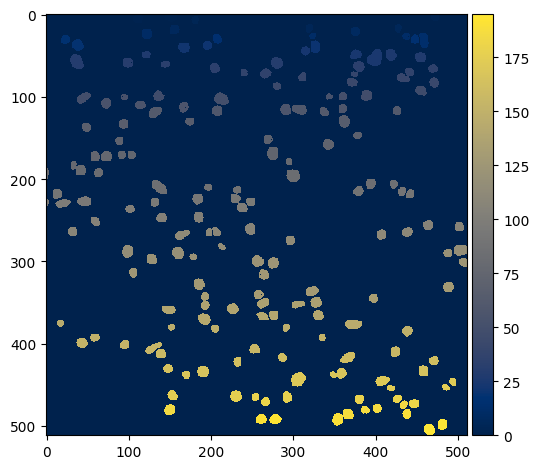

In [10]:
pred1 = io.imread(f"./{output_path}/14728_label.tiff")
io.imshow(pred1, cmap="cividis")

cell_count = len(np.unique(pred1))-1 # exclude the background
print(f"\n{cell_count} Cells detected!")


183 Cells detected!


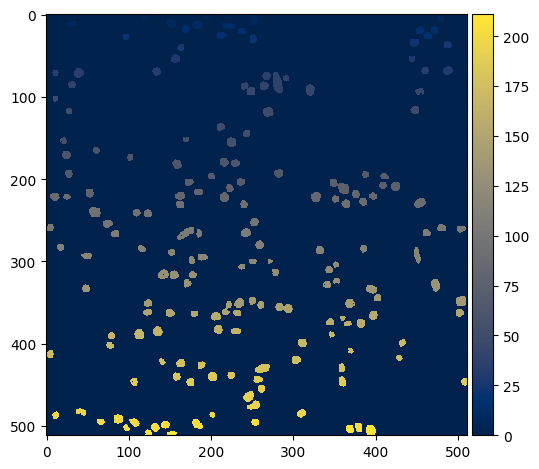

In [11]:
pred1 = io.imread(f"./{output_path}/14730_label.tiff")
io.imshow(pred1, cmap="cividis")

cell_count = len(np.unique(pred1))-1 # exclude the background
print(f"\n{cell_count} Cells detected!")


22 Cells detected!


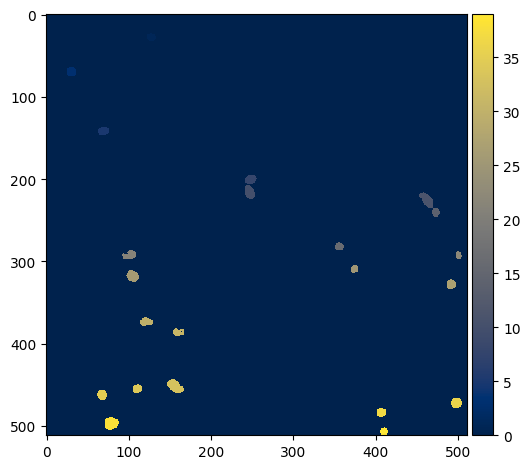

In [12]:
pred1 = io.imread(f"./{output_path}/14732_label.tiff")
io.imshow(pred1, cmap="cividis")

cell_count = len(np.unique(pred1))-1 # exclude the background
print(f"\n{cell_count} Cells detected!")


90 Cells detected!


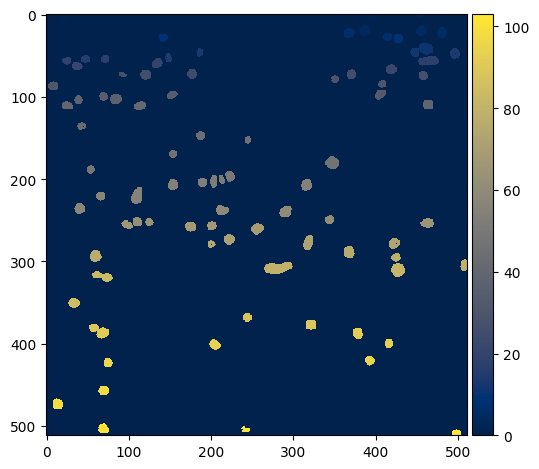

In [13]:
pred1 = io.imread(f"./{output_path}/14880_label.tiff")
io.imshow(pred1, cmap="cividis")

cell_count = len(np.unique(pred1))-1 # exclude the background
print(f"\n{cell_count} Cells detected!")


49 Cells detected!


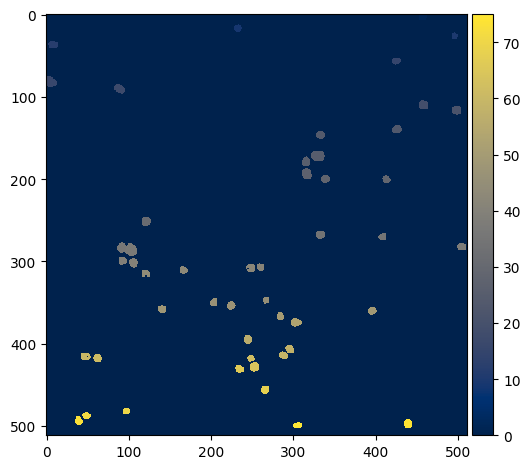

In [14]:
pred1 = io.imread(f"./{output_path}/14882_label.tiff")
io.imshow(pred1, cmap="cividis")

cell_count = len(np.unique(pred1))-1 # exclude the background
print(f"\n{cell_count} Cells detected!")


8 Cells detected!


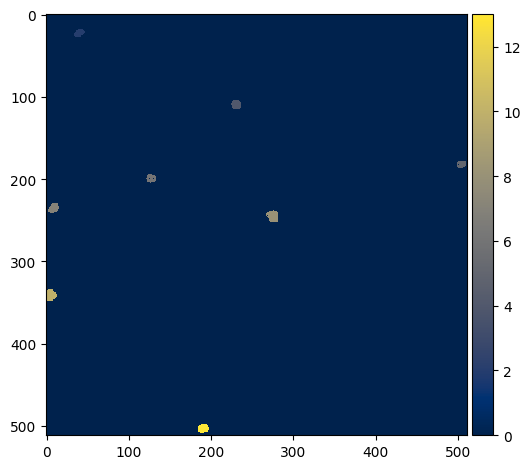

In [15]:
pred1 = io.imread(f"./{output_path}/15188_label.tiff")
io.imshow(pred1, cmap="cividis")

cell_count = len(np.unique(pred1))-1 # exclude the background
print(f"\n{cell_count} Cells detected!")


11 Cells detected!


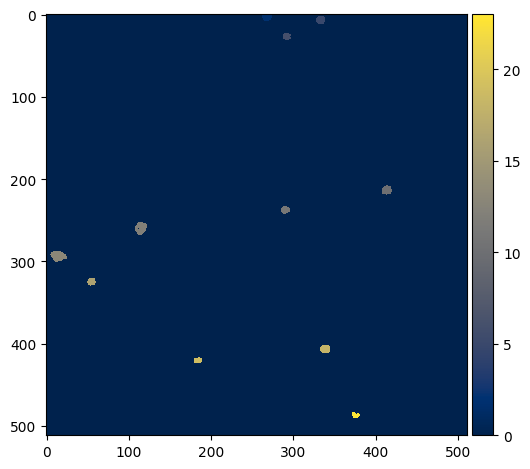

In [16]:
pred1 = io.imread(f"./{output_path}/15340_label.tiff")
io.imshow(pred1, cmap="cividis")

cell_count = len(np.unique(pred1))-1 # exclude the background
print(f"\n{cell_count} Cells detected!")